In [12]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus
from astropy.wcs import WCS
from photutils.detection import DAOStarFinder
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.stats import mad_std

In [2]:
im_test='./WCS_Solved/NGC3705/NGC3705_R.fits'
image=fits.open(im_test)[0].data
hdr=fits.open(im_test)[0].header
wcs=WCS(hdr)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 172.51029444  9.36072906725  
CRPIX : 770.781943321  395.987697601  
CD1_1 CD1_2  : -0.000174355101095  2.2113550891e-06  
CD2_1 CD2_2  : -2.14463484616e-06  -0.000174214452194  
NAXIS : 2048  2054


In [3]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2054                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2024-03-13T02:59:00' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
OBSERVAT= 'CAHA    '           / Observatory name                               
OBSCODE = '493     '           / IAU observatory code                           
TELESCOP= 'CA 1.23m'           / Telescope name                                 
INSTRUME= 'DLR-MKIV'           / Instrument name                                
FLENGTH =                988

(0.0, 2048.0)

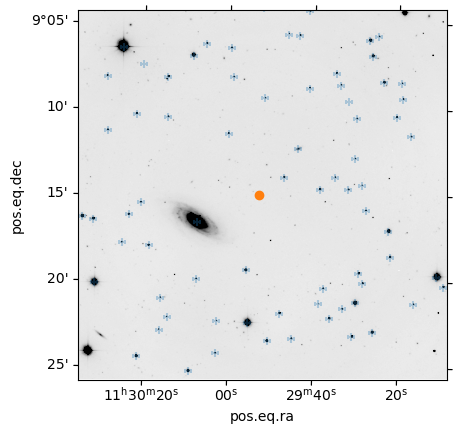

In [60]:
fig=plt.figure()
ax=fig.add_subplot(111,projection=wcs)
plt.imshow(image,vmin=400,vmax=800,cmap='Greys')
plt.scatter(references[0],references[2],transform=ax.get_transform('world'),marker='+',alpha=0.3)
plt.scatter([172.47],[9.25],transform=ax.get_transform('world'))
plt.ylim(0, image.shape[0])
plt.xlim(0, image.shape[1])

In [262]:
references=np.transpose(np.genfromtxt('./test_ref5.csv',delimiter=',',skip_header=1,filling_values=np.NaN))
#print(references[0])
#print(references[2])

In [261]:
bkgstd=mad_std(image)
daofinds= DAOStarFinder(fwhm=6,threshold=20*bkgstd)
sources=daofinds.find_stars(image)
#print(sources)

In [16]:
print(sources.keys())

['id', 'xcentroid', 'ycentroid', 'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux', 'mag']


2054


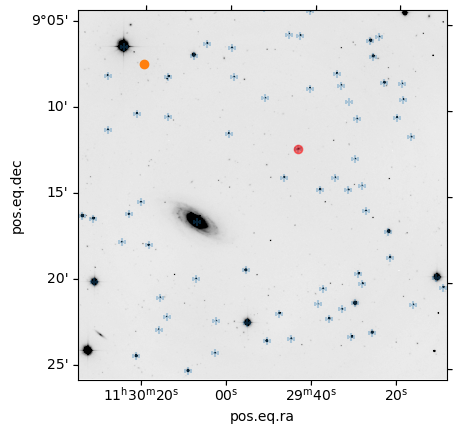

In [378]:
fig=plt.figure()
ax=fig.add_subplot(111,projection=wcs)
plt.imshow(image,vmin=400,vmax=800,cmap='Greys')
plt.scatter(references[0],references[2],transform=ax.get_transform('world'),marker='+',alpha=0.3)
plt.scatter(references[0][35],references[2][35],transform=ax.get_transform('world'),alpha=0.5,color='r')
#plt.scatter(positions[56][0],positions[56][1])
#plt.scatter(sources['xcentroid'],sources['ycentroid'],marker='x',color='r',alpha=0.3)
plt.ylim(0, image.shape[0])
plt.xlim(0, image.shape[1])
print(image.shape[0])

364.4826963515263 1755.0547375948784
2054


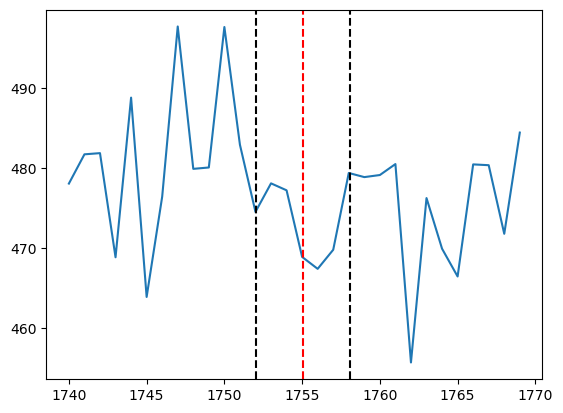

In [381]:
ind=66
c=SkyCoord(ra=references[0][ind],dec=references[2][ind],unit='deg')
ap_size=3
test_x_ind,test_y_ind=wcs.world_to_pixel(c)
#test_y_ind=int(sources[ind]['ycentroid'])
print(test_x_ind,test_y_ind)
test_x_ind_int=int(test_x_ind)
test_y_ind_int=int(test_y_ind)
size=15
plt.plot(range(test_y_ind_int-size,test_y_ind_int+size),image[test_y_ind_int-size:test_y_ind_int+size,test_x_ind_int])
plt.axvline(x=test_y_ind,color='r',ls='--')
plt.axvline(x=test_y_ind-ap_size,color='black',ls='--')
plt.axvline(x=test_y_ind+ap_size,color='black',ls='--')

#plt.
print(len(image[:,1]))

In [382]:
#Issues with 33,45,48 All outside of region
#No peaks in 22,37,41,43,49,66,78,72
#22,66 is faint, no reference R anyway
#37,41,43,49,78 is out of frame
#72 is just massively saturated
#Saturated 1,46,72,75
#57 is odd because its within the galaxy
masked=[22,57,66]
full_masked=[]
for ind in range(0,len(references[0])):
    #print(ind)
    c=SkyCoord(ra=references[0][ind],dec=references[2][ind],unit='deg')
    ap_size=3
    test_x_ind,test_y_ind=wcs.world_to_pixel(c)
    #test_y_ind=int(sources[ind]['ycentroid'])
#print(test_x_ind,test_y_ind)
    test_x_ind_int=int(test_x_ind)
    test_y_ind_int=int(test_y_ind)
    if test_x_ind<20 or test_y_ind<20 or test_x_ind>image.shape[1]-20 or test_y_ind>image.shape[0]-20 or image[test_y_ind_int,test_x_ind_int]>100_000 or ind in masked:
        full_masked.append(ind)
        print(ind)
        continue
    size=15
    plt.plot(range(test_y_ind_int-size,test_y_ind_int+size),image[test_y_ind_int-size:test_y_ind_int+size,test_x_ind_int])
    plt.axvline(x=test_y_ind,color='r',ls='--')
    plt.axvline(x=test_y_ind-ap_size,color='black',ls='--')
    plt.axvline(x=test_y_ind+ap_size,color='black',ls='--')
    plt.savefig(f'./Diagnostics/{ind}.png')
    plt.close()

1
22
33
37
41
43
45
46
48
49
57
66
72
75
78


In [383]:
positions=[]
for ind,(ra,dec) in enumerate(zip(references[0],references[2])):
    if ind not in full_masked:
        positions.append(wcs.world_to_pixel(SkyCoord(ra=ra,dec=dec,unit='deg')))
print(positions[0])

(array(2027.9089406), array(511.02911158))


In [384]:
radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
apertures = [CircularAperture(positions, r=r) for r in radii]
phot_table = aperture_photometry(image, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
print(phot_table)

 id  xcenter   ycenter  ... aperture_sum_7 aperture_sum_8 aperture_sum_9
       pix       pix    ...                                             
--- --------- --------- ... -------------- -------------- --------------
  1 2027.9089 511.02911 ...      197415.32      223948.97      253072.94
  2  1860.886  414.2177 ...       118925.8      144366.66      172614.07
  3 1850.8309 1345.5223 ...      139906.17      165499.71      193922.06
  4 1806.6038 1554.2424 ...      129887.64      155527.85      183951.29
  5  1801.095 1641.5159 ...      116973.72      142479.48      170847.94
  6  1770.244  1454.416 ...      150046.25      175968.49      204582.83
  7  1732.023 677.98181 ...      219850.53      246731.69      276167.01
  8 1724.1738 821.37238 ...      1252621.7      1293205.8      1332936.6
  9 1700.4631 1647.1291 ...      302514.35      331550.02      362638.17
 10 1673.2219 1901.3376 ...      127568.14      153443.06      182116.89
...       ...       ... ...            ...         

In [385]:
annulus_aperture = CircularAnnulus(positions, r_in=12., r_out=15.)
phot_table1 = aperture_photometry(image, annulus_aperture)
for col in phot_table1.colnames:
    phot_table1[col].info.format = '%.8g'
print(phot_table1)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 2027.9089 511.02911    120960.87
  2  1860.886  414.2177    119404.68
  3 1850.8309 1345.5223    119266.31
  4 1806.6038 1554.2424    120070.09
  5  1801.095 1641.5159    120602.02
  6  1770.244  1454.416    119930.42
  7  1732.023 677.98181    121382.73
  8 1724.1738 821.37238    133728.06
  9 1700.4631 1647.1291    124068.45
 10 1673.2219 1901.3376    121502.39
...       ...       ...          ...
 55 391.54392 745.45991    119063.25
 56 349.27338 984.19445    119774.25
 57 322.88249 129.42553    123914.72
 58 326.30743 1476.2047    120830.96
 59 282.25529 917.61621    119838.94
 60 242.30834 762.09686    118726.42
 61 165.86193 1385.5032    121094.81
 62 163.35068 1687.0312    121736.69
 63 84.913164 893.82825    128052.34
 64 23.607009 907.51386     129091.6
Length = 64 rows


In [386]:
bkg_mean = phot_table1['aperture_sum'] / annulus_aperture.area
#print(bkg_mean)


In [387]:
bkg_total=bkg_mean*apertures[0].area

In [388]:
snr = np.array([])
snr1=[]
index = 0
for col in phot_table.colnames[3:]:
    bkg_total = bkg_mean * apertures[index].area
    net_star = phot_table[col] - bkg_total
    snr_arr=net_star/np.sqrt(net_star+bkg_total)
    snr1.append(snr_arr)
    snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
    index += 1

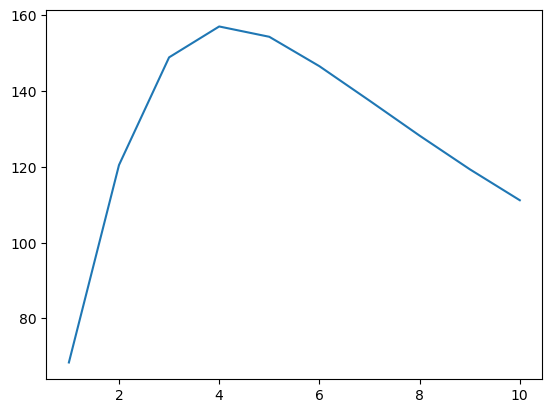

In [389]:
plt.plot(radii,[np.median(el) for el in snr1])

In [1]:
circ_ap =CircularAperture(positions, r=np.argmax([np.median(el) for el in snr1]))
annulus_ap = CircularAnnulus(positions, r_in=12., r_out=15.)
aps=[circ_ap,annulus_ap]
phot_table = aperture_photometry(image, aps)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
bkg_total=bkg_mean*circ_ap.area
net_star=phot_table['aperture_sum_0']-bkg_total
inst_mags=-2.5*np.log10(net_star)
snr_arr=net_star/np.sqrt(net_star+bkg_total)
#print(inst_mags)
print(np.median(snr_arr))
print(np.mean(snr_arr))
print(np.max(snr_arr))
print(np.argmin(snr_arr))
print(np.min(snr_arr))
print(wcs.pixel_to_world(positions[56][0],positions[56][1]))
#print(phot_table)

NameError: name 'CircularAperture' is not defined

In [395]:
r_mags=references[16]
dr_mags=references[17]
i_mags=references[19]
di_mags=references[20]
R_mags=[]
dR_mags=[]
a=-0.153
b=0.117
da=0.003
db=0.03
for r,dr,i,di in zip(r_mags,dr_mags,i_mags,di_mags):
   R=a*(r-i)-b+r
   dR=np.sqrt(((r-i)**2)*da**2+db**2+((a+1)*dr)**2+(a*di)**2)
   R_mags.append(R)
   dR_mags.append(dR)
print(R_mags)
print(dR_mags)
Reduced_R_mags=[R_mags[ind] for ind in range(len(R_mags)) if ind not in full_masked]
Reduced_dR_mags=[dR_mags[ind] for ind in range(len(R_mags)) if ind not in full_masked]
print(len(R_mags))
print(len(Reduced_R_mags))

#print(r_mags[0])

[15.235919, 9.8098, 16.857704000000002, 16.163624, 16.428029, 16.985087999999998, 15.919423, 15.036805, 12.625914, 14.505509, 16.547368, 13.629778, 13.646651, 13.34852, 16.577958, 15.990887999999998, 16.827856, 14.963673, 16.497125, 12.081498, 16.732878, 14.903265000000001, nan, 16.009629, 16.432727, 16.565533000000002, 15.959582999999999, 16.680217, 14.884241, 16.338613, 14.982941, nan, 16.556275, 15.061063, 16.165045, 15.929401, 15.946181000000001, 11.759722, nan, 15.707068, 15.019007, 13.026760999999999, 14.075488, 14.921797, nan, nan, 9.883642, 13.672134, 15.892729, 10.544826, 16.568877, 16.182641999999998, 16.142941, nan, 16.76437, 15.893958000000001, 16.481336, 12.483494, 12.157089, 13.494537000000001, nan, 16.152214, 15.163898999999999, 17.060305, nan, 15.167672999999999, nan, 16.422040000000003, 13.636204, 15.527351, 15.351089, 16.526026, 7.873071, 16.165602999999997, 16.033383, 9.736575, 13.951859, 13.02387, 16.697571]
[0.05894837095289403, 0.07412392175269736, 0.1237927024545

In [396]:
def Linfunc(x,a,b):
    return a*x+b
test_space=np.linspace(-16,-10,100)

27.567947566482253
27.53662291081426


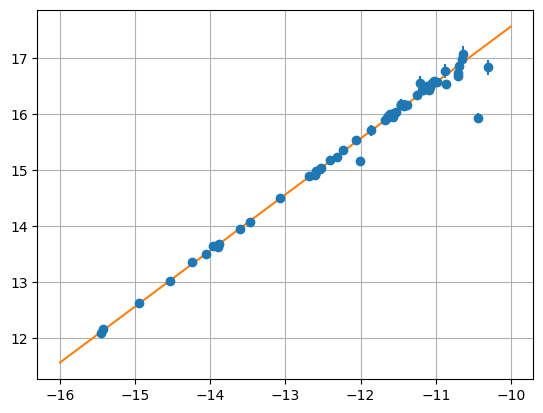

In [397]:
plt.errorbar(inst_mags,Reduced_R_mags,xerr=np.abs(1/snr_arr), yerr=Reduced_dR_mags,fmt='o')
plt.plot(test_space,Linfunc(test_space,1,27.56))
plt.grid(True)
print(np.nanmedian(Reduced_R_mags-inst_mags))
print(np.nanmean(Reduced_R_mags-inst_mags))

<function matplotlib.pyplot.xlim(*args, **kwargs) -> 'tuple[float, float]'>

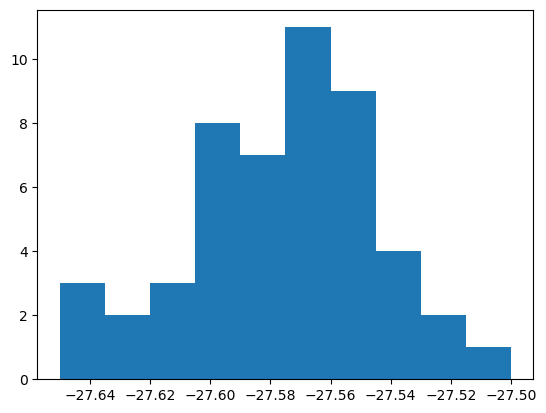

In [398]:
plt.hist(inst_mags-Reduced_R_mags,range=(-27.65,-27.5),bins=10)
plt.xlim

In [426]:
zp_arr=[]
for r in range(2,11):
    circ_ap =CircularAperture(positions, r=r)
    annulus_ap = CircularAnnulus(positions, r_in=12., r_out=15.)
    aps=[circ_ap,annulus_ap]
    phot_table = aperture_photometry(image, aps)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
    bkg_total=bkg_mean*circ_ap.area
    net_star=phot_table['aperture_sum_0']-bkg_total
    inst_mags=-2.5*np.log10(net_star)
    zps=[Reduced_R_mags-inst_mags]
    zp_arr.append(zps)

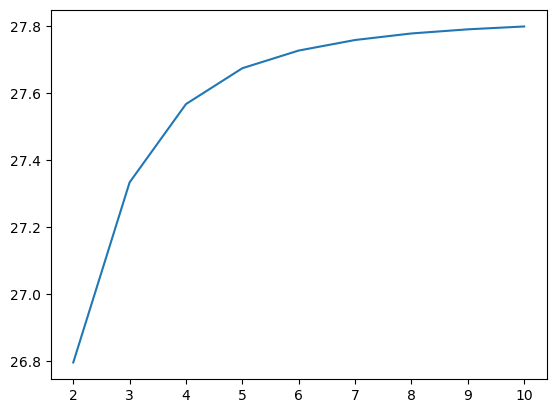

In [428]:
plt.plot(range(2,11),np.asarray([np.nanmedian(el) for el in zp_arr]))